In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numba import njit, prange

In [3]:
np.random.seed(42)  # Đảm bảo kết quả nhất quán

def createNodes(N, scale=100):
    """Tạo một danh sách các thành phố (nút) với tọa độ ngẫu nhiên"""
    return np.random.rand(N, 2) * scale

In [4]:
def quot_tsp(nodes : np.ndarray):
    current_node = nodes[0]
    visited = np.array([nodes[0]])
    unvisited = nodes[1:]

    while len(unvisited) != 0:
        centroid = np.average(np.vstack((unvisited, nodes[0])), axis=0)
        unvisited_count = len(unvisited)
        qcosts = np.empty(unvisited_count)
        
        for i in range(unvisited_count):
            dist_cost = np.linalg.norm(unvisited[i] - current_node)
            centroid_cost = np.linalg.norm(unvisited[i] - centroid)
            qcosts[i] = dist_cost / (centroid_cost)

        min_idx = np.argmin(qcosts, keepdims=True)
        visited = np.vstack((visited, unvisited[min_idx]))
        current_node = unvisited[min_idx]
        unvisited = np.delete(unvisited, min_idx, axis=0)
    
    return visited

In [5]:
def nn_tsp(nodes : np.ndarray):
    current_node = nodes[0]
    visited = np.array([nodes[0]])
    unvisited = nodes[1:]

    while len(unvisited) != 0:
        centroid = np.average(visited, axis=0)
        unvisited_count = len(unvisited)
        costs = np.empty(unvisited_count)
        
        for i in range(unvisited_count):
            costs[i] = np.linalg.norm(unvisited[i] - current_node)

        min_idx = np.argmin(costs, keepdims=True)
        visited = np.vstack((visited, unvisited[min_idx]))
        current_node = unvisited[min_idx]
        unvisited = np.delete(unvisited, min_idx, axis=0)
    
    return visited

In [6]:
def qcent_tsp(nodes: np.ndarray):
    current_node = nodes[0]
    visited = np.array([nodes[0]])
    unvisited = nodes[1:]

    while len(unvisited) != 0:
        centroid = np.average(nodes)
        unvisited_count = len(unvisited)
        qcosts = np.empty(unvisited_count)
        
        for i in range(unvisited_count):
            dist_cost = np.linalg.norm(unvisited[i] - current_node)
            centroid_cost = np.linalg.norm(unvisited[i] - centroid)
            qcosts[i] = dist_cost / (centroid_cost)

        min_idx = np.argmin(qcosts, keepdims=True)
        visited = np.vstack((visited, unvisited[min_idx]))
        current_node = unvisited[min_idx]
        unvisited = np.delete(unvisited, min_idx, axis=0)
    
    return visited

In [6]:
def tour_cost(path):
    cost = 0
    prev_node = path[0]
    path = path[1:]
    for node in path:
        cost += np.linalg.norm(node - prev_node)
        prev_node = node
    cost += np.linalg.norm(prev_node - path[0])
    return cost

In [8]:
# Local search
# def local_search(path)
    

# def switch_path(path, idx1, idx2):
#     i1 = min(idx1, idx2)
#     i2 = max(idx1, idx2) + 1
#     path[i1:i2] = np.flip(path[i1:i2], axis=0)
#     return path

In [7]:
# Visualization
def draw_nodes(nodes):
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.scatter(nodes[0, 0], nodes[0, 1], color=['red'])
    plt.scatter(nodes[1:, 0], nodes[1:, 1])
    plt.show()

def draw_tsp_sol(path):
    fig, ax = plt.subplots(figsize=(5, 5))
    plt.scatter(path[0, 0], path[0, 1], color=['red'])
    plt.scatter(path[1:, 0], path[1:, 1])

    for i in range(len(path) - 1):
        plt.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-')
        ax.annotate(f"{str(i+1)} ", (path[i][0], path[i][1]))
        
    plt.plot([path[-1][0], path[0][0]], [path[-1][1], path[0][1]], 'k-')
    plt.show()

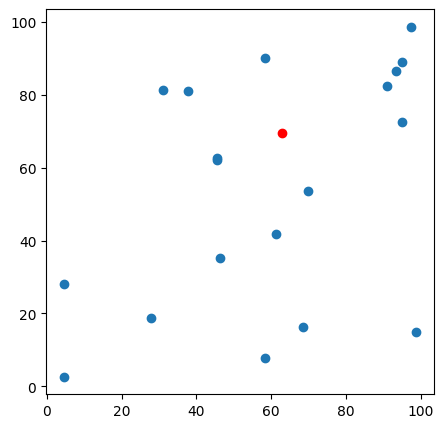

In [22]:
nodes = createNodes(20)
draw_nodes(nodes)

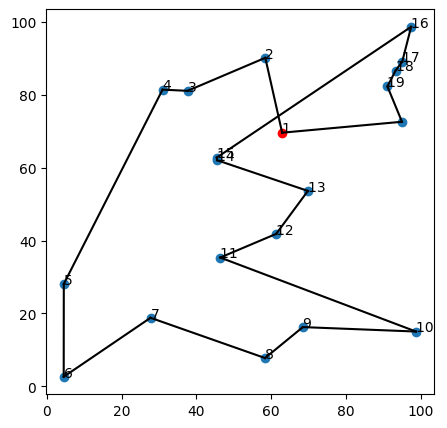

Total tour cost:  484.951899350609


In [23]:
path = quot_tsp(nodes)
draw_tsp_sol(path)
print("Total tour cost: ", tour_cost(path))

(array([56., 33.,  6.,  1.,  1.,  0.,  0.,  1.,  1.,  1.]),
 array([ 0.26731051,  7.31907646, 14.37084241, 21.42260836, 28.47437431,
        35.52614026, 42.57790621, 49.62967216, 56.68143811, 63.73320406,
        70.78497001]),
 <BarContainer object of 10 artists>)

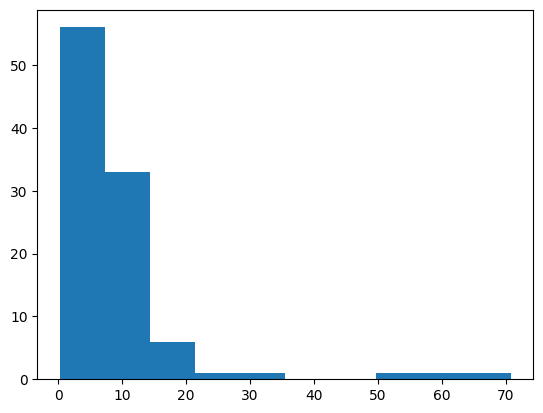

In [11]:
path_dists = [np.linalg.norm(path[i] - path[i-1]) for i in range(1, len(path))]
path_dists.append(np.linalg.norm(path[-1] - path[0]))
# print(np.histogram(a=path_dists, bins=10))
plt.hist(path_dists, bins=10)

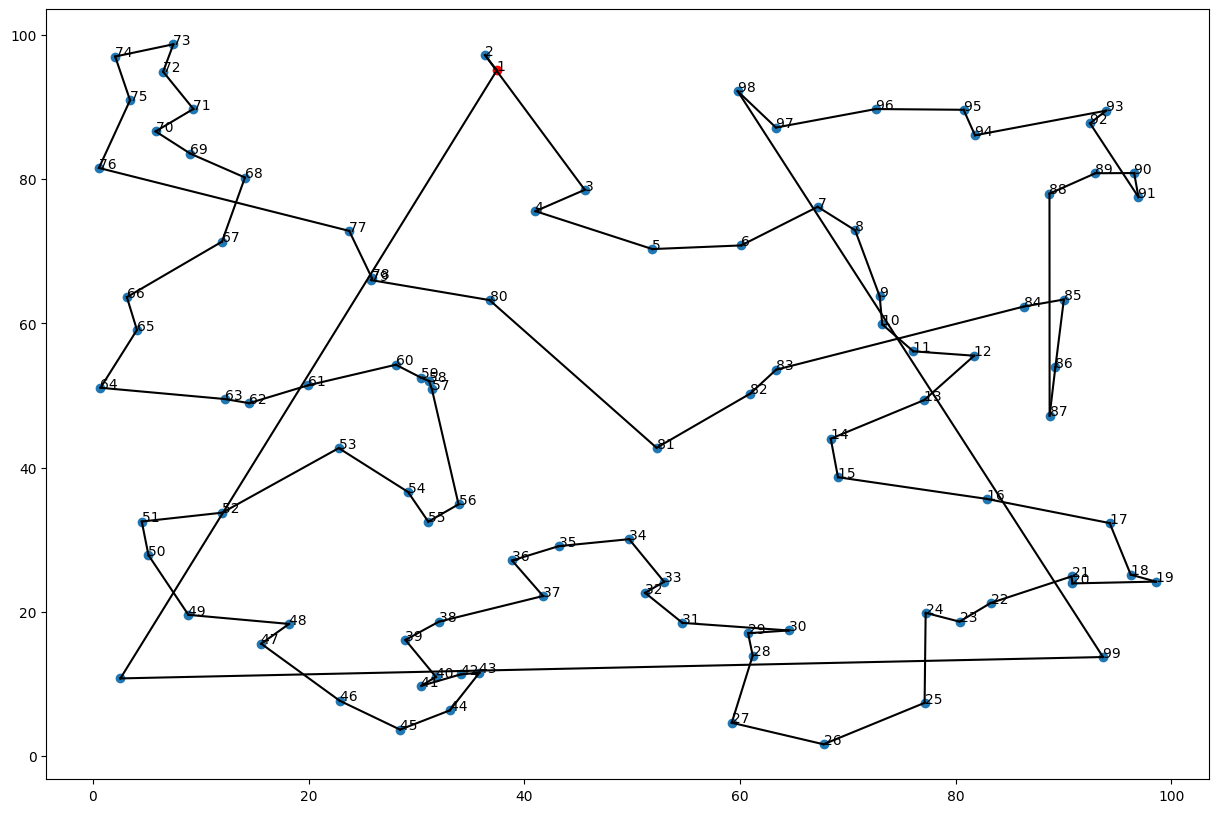

Total tour cost:  1007.9434584512971


In [12]:
path = nn_tsp(nodes)
draw_tsp_sol(path)
print("Total tour cost: ", tour_cost(path))

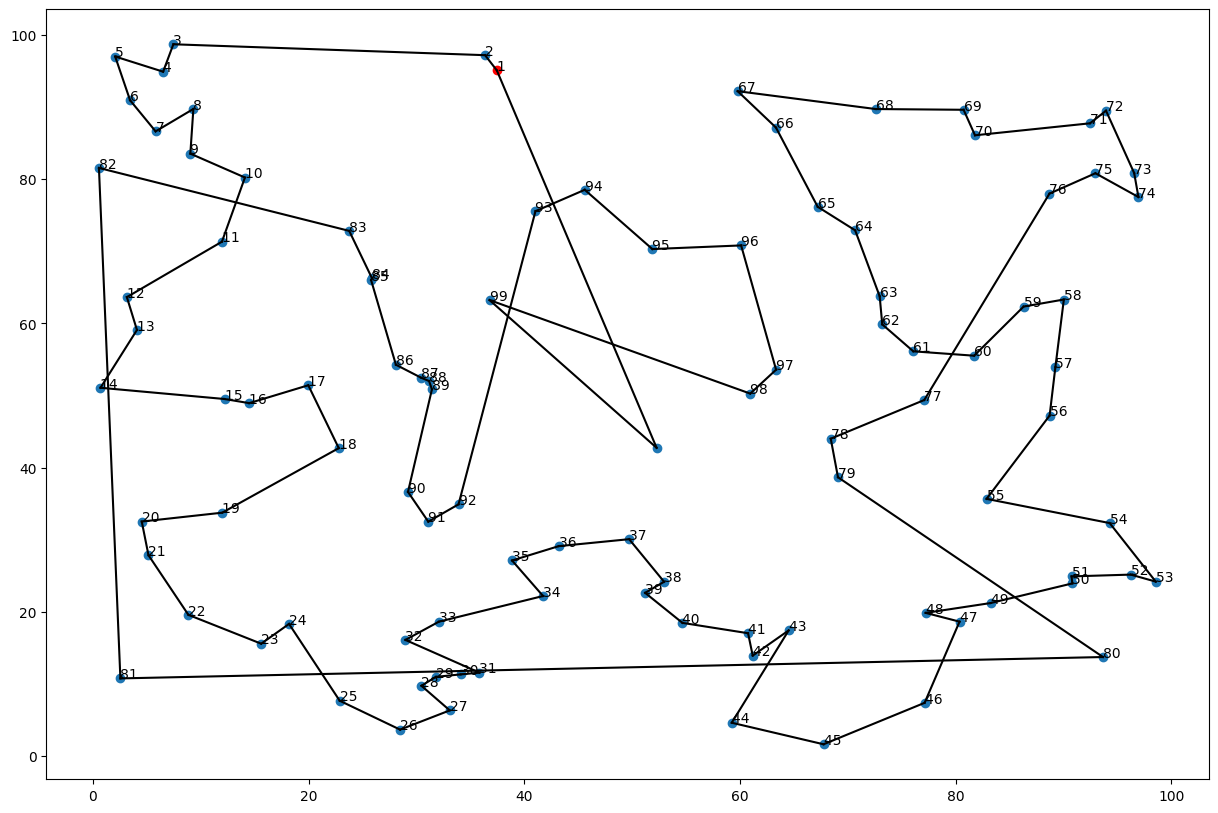

Total tour cost:  1033.8507544119918


In [13]:
path = qcent_tsp(nodes)
draw_tsp_sol(path)
print("Total tour cost: ", tour_cost(path))

In [14]:
def compute_avg_cost(node_count=100, iters=100):
    quot_avg = 0
    nn_avg = 0
    qcent_avg = 0
    
    for _ in range(iters):
        nodes = createNodes(node_count, 2000)
        quot_avg += tour_cost(quot_tsp(nodes)) / iters
        nn_avg += tour_cost(nn_tsp(nodes)) / iters
        qcent_avg += tour_cost(qcent_tsp(nodes)) / iters

    print("Avg quot cost: ", quot_avg)
    print("Avg nn cost: ", nn_avg)
    print("Avg qcent cost: ", qcent_avg)

compute_avg_cost(100, 30)

Avg quot cost:  18206.607580873315
Avg nn cost:  19440.628570638255
Avg qcent cost:  18759.999232275444


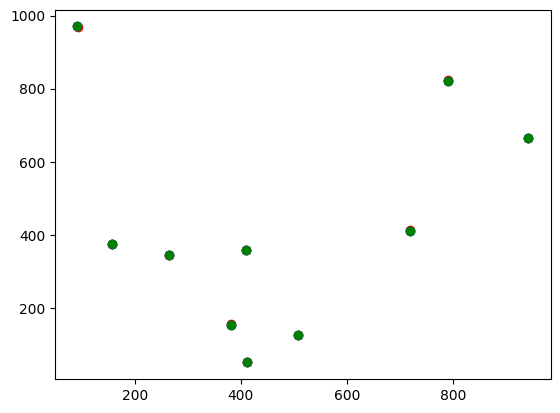

In [15]:
L_0 = 1024
N = 10
c = 8


# PTAS TSP
nodes = createNodes(N, L_0).astype(np.int16)

# grid = [np.empty(()) for i in range()]

# def grid_snap(node, grid_size):
#     ret = np.empty(2)
#     for node in nodes:
#         if node[0] % grid_size < node[1] % grid_size:
#             ret[0] = node[0] / grid_size
#         else:
#             ret[1] = node[1] / grid_size
#     return ret

def grid_snap(node, grid_size):
    return np.round(node / grid_size) * grid_size

grid_size = L_0/(N*c*8)
s1_node = [grid_snap(node, L_0/(N*c*8)) for node in nodes]
s2_node = [grid_snap(node, L_0/(N*c*64)) for node in nodes]
# s3_node = [grid_snap(node, L_0/(*N*c*8)) for node in nodes]

a = np.random.randint(0, L_0)
b = np.random.randint(0, L_0)

for s1, s2, node in zip(s1_node, s2_node, nodes):
    plt.scatter(s1[0], s1[1], c='red')
    plt.scatter(s2[0], s2[1], c='blue')
    plt.scatter(node[0], node[1], c='green')

In [8]:
# Reference-based quadtree
class QuadTree:
    def __init__(self, length, m, parent=None) -> None:
        self.parent = parent
        self.children = None
        self.origin = np.array((0, 0)) # góc dưới bên trái của ô
        self.length = length # Độ dài cạnh ô
        self.value = None
        self.divided = False
        self.portals = []
        self.m = m


    def divide(self) -> list:
        self.divided = True
        c_leng = self.length/2
        self.children = (QuadTree(c_leng, self.m, parent=self) for _ in range(4))
        self.children[0].origin = self.origin
        self.children[1].origin = self.origin + np.array((c_leng, 0))
        self.children[2].origin = self.origin + np.array((0, c_leng))
        self.children[3].origin = self.origin + np.array((c_leng, c_leng))
        return self.children
    

    def child(self, index : int):
        if not self.divided:
            return self.divide()[index]
        return self.children[index]
        

# class Portal:
#     def __init__(self) -> None:
#         self.position = None
#         self.


# class BidirectionalMap:
#     def __init__(self) -> None:
#         self.val = {}
#         self.key = {}

#     def put(self, key, val):
#         self.val[key] = val
#         self.key[val] = key

In [17]:
temp = (p1_nodes + np.array((239, 6))) % (L_0/(8*n*c))
temp

NameError: name 'p1_nodes' is not defined

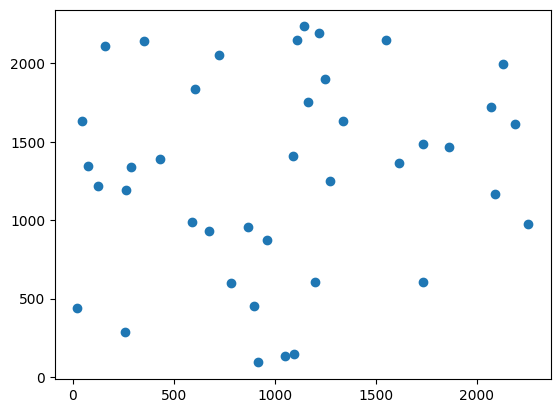

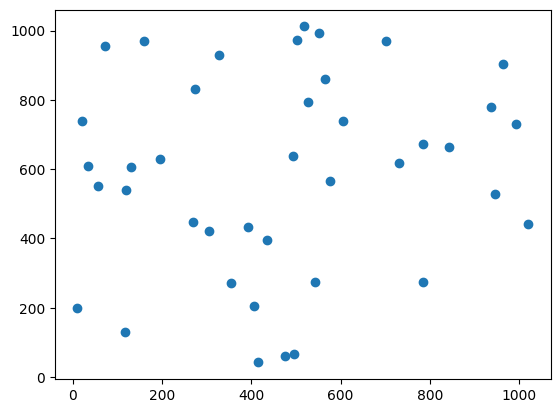

In [ ]:
# def snap(nodes: np.ndarray, scale):
#     return np.round(nodes * scale)

# s = N**2 * np.sqrt(2) / L_0
# temp = snap(nodes, s)

N = 40
L_0 = 1024
epsilon = 3

nodes = createNodes(40, L_0)

def pertubate(nodes, L_0):
    return np.round(nodes * (N**2 * np.sqrt(2) / L_0))

temp = pertubate(nodes, L_0)

plt.scatter(temp[:, 0], temp[:, 1])
plt.show()

plt.scatter(nodes[:, 0], nodes[:, 1])
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

np.random.seed(42)  # Đảm bảo kết quả nhất quán

def createNodes(N, scale=100):
    """Tạo nút ngẫu nhiên"""
    # Tạo một danh sách các thành phố (nút) với tọa độ ngẫu nhiên
    return np.random.rand(N, 2) * scale

class AroraQuadTree:
    """Quadtree được sử dụng trong Arora PTAS
    
    nodes: Các điểm cần đi qua trong bài toán TSP
    root: Gốc của cây, dạng TreeNode
    bounds: độ to của bounding box. bounds > max(nodes)

    """
    def __init__(self) -> None:
        """Khởi tạo các giá trị mặc định cho cây
        """
        self.nodes: np.ndarray = []
        self.root : TreeNode = TreeNode()
        self.levels = 0
        self.bound = 0


    def build_tree(self):
        """Dựng quadtree, dựa trên nodes
        Cần phải nhập nodes và bounds trước khi gọi hàm này
        """
        assert self.bound != 0, "Cần nhập bound của cây trước!"
        assert self.bound > np.max(self.nodes), "Bounds không đủ to để chứa mọi node!"
        assert len(self.nodes), "Cần nhập danh sách node cho cây!"
        self.root.vertex = self.nodes
        self.root.bbox.bound = np.array((self.bound, self.bound))
        TreeNode.divide(self.root)


    def draw(self, figsize=(10, 10)):
        """Vẽ quadtree
        figsize: Độ lớn của hình
        """
        fig, ax = plt.subplots(figsize=figsize)
        self.root.draw(ax)
        plt.show()


class TreeNode:
    """Nút của quadtree

    level: Độ sâu trên cây
    parent: Nút cha
    children: Các nút con
    is_leaf: True nếu là nút lá và vertex != None

    bbox: HCN bao quanh
    vertex: Các điểm nằm trong bbox
    portals:
    """
    def __init__(self, box=(0,0,0,0)) -> None:
        self.level = 0
        self.parent = None
        self.children = None
        self.neighbors = []
        self.bbox = BBox(box)
        self.is_leaf = False
        self.portals = np.array([]).reshape((0, 2))
        self.local_idx = -1
        self.vertex = None
        self.directions = []
        self.solutions = []


    def divide(node):
        """Tạo 4 nút con
        node: nút đang xét
        """
        node.children = [TreeNode(), TreeNode(), TreeNode(), TreeNode()]
        for child in node.children:
            child.parent = node
            child.bbox.bound = node.bbox.bound // 2
            child.level = node.level + 1
        
        b, _ = node.bbox.bound // 2
        node.children[0].bbox.pos = node.bbox.pos
        node.children[1].bbox.pos = node.bbox.pos + np.array((0, b))
        node.children[2].bbox.pos = node.bbox.pos + np.array((b, 0))
        node.children[3].bbox.pos = node.bbox.pos + np.array((b, b))

        for i in range(4):
            node.children[i].local_idx = i

        for child in node.children:
            child.vertex = node.vertex[[child.bbox.is_inside(m) for m in node.vertex]]
            if len(child.vertex) == 0:
                continue
            if len(child.vertex) == 1:
                child.is_leaf = True
                continue
            TreeNode.divide(child)

        for i1 in range(4): # Thêm portals
            for i2 in range(i1+1, 4):
                if len(node.children[i1].vertex) > 0 and len(node.children[i2].vertex) > 0:
                    dir = TreeNode.idx_to_vec(i1, i2)
                    node.children[i1].directions.append(dir)
                    node.children[i2].directions.append(- dir)
                    portals = TreeNode.calc_portals(node.children[i1].bbox.pos, node.children[i1].bbox.bound[0], dir, m=2)
                    # print(f"portals: {portals}")
                    # print(f"node portals: {node.children[i].portals}")

                    node.children[i1].portals = np.concatenate((node.children[i1].portals, portals), axis=0)
                    node.children[i2].portals = np.concatenate((node.children[i2].portals, portals), axis=0)
                    node.children[i1].neighbors.append(node.children[i2])
                    node.children[i2].neighbors.append(node.children[i1])
            
        

    def calc_portals(pos: np.array, bound: int, dir: np.array, m: int=1):
        '''Tính toán vị trí các portal
        '''
        bound_vec = np.array((bound, bound))
        corners = np.array(((-1, -1), (1, 1), (-1, 1), (1, -1))) # trong góc
        if np.any([np.all(np.equal(corner, dir)) for corner in corners]):
            dir = (dir + 1) / 2
            return [pos + np.multiply(bound_vec, dir)]
        
        m += 1
        if np.array_equiv(dir, np.array((0, 1))): # bên phải
            return [pos + np.array((a*(bound / m), bound)) for a in range(1, m)]
        
        if np.array_equiv(dir, np.array((1, 0))): # bên trên            
            return [pos + np.array((bound, a*(bound/m))) for a in range(1, m)]
        
        if np.array_equiv(dir, np.array((0, -1))): # bên trái
            return [pos + np.array((a*(bound / m), 0)) for a in range(1, m)]
        
        if np.array_equiv(dir, np.array((-1, 0))): # bên dưới
            return [pos + np.array((0, a*(bound / m))) for a in range(1, m)]


    
    def idx_to_vec(i1 : int, i2 : int):
        i1v = np.array((i1 // 2, i1 % 2))
        i2v = np.array(((i2 // 2, i2 % 2)))
        return i2v - i1v


    def draw(self, ax):
        """Vẽ bbox và vertex. Làm tương tự với các nút con
        ax: Matplotlib axes
        """
        if self.level == 1:
            self.bbox.draw(ax) # vẽ bbox
        # center = self.bbox.center()
        # bound = self.bbox.bound[0]
        # for dir in self.directions:
        #     pointlist = np.array(TreeNode.calc_portals(self.bbox.pos, bound, dir, m=2))
        #     for point in pointlist:
        #         plt.scatter(point[0], point[1], marker='x', c='r')
                # ax.annotate(self.bbox.pos, (point[0], point[1]))

        # plt.scatter(self.portals[:, 0], self.portals[:, 1], marker='x', c='r') # vẽ portals 

        if self.is_leaf: # vẽ các điểm
            for i in range(len(self.vertex)):
                plt.scatter(self.vertex[i, 0], self.vertex[i, 1], color='b')
                # ax.annotate(self.level, (self.vertex[i, 0], self.vertex[i, 1]))
            return

        if self.children == None:
            return
        for child in self.children:
            child.draw(ax)



class BBox:
    """Hình chữ nhật trong không gian 2D"""
    def __init__(self, box=(0,0,0,0)) -> None:
        """Khởi tạo hình chữ nhật
        box: vị trí và kích cỡ hcn
        """
        self.pos = np.array((box[0], box[1]))
        self.bound = np.array((box[2], box[3]))


    def is_inside(self, p) -> bool:
        """Kiểm tra điểm p có nằm trong hcn không
        Nếu p ở trên cạnh trên hoặc cạnh trái => False
        Nếu ở cạnh dưới hoặc cạnh phải => True

        p: Tọa độ điểm cần kiểm tra
        """
        return np.all(self.pos < p) and np.all(p <= self.pos + self.bound)
    

    def is_inside_inclusive(self, p) -> bool:
        """Kiểm tra điểm p có nằm trong hcn không
        Nếu p ở trên cạnh hcn => True

        p: Tọa độ điểm cần kiểm tra
        """
        return np.all(self.pos <= p) and np.all(p <= self.pos + self.bound)
    

    def is_inside_exclusive(self, p) -> bool:
        """Kiểm tra điểm p có nằm trong hcn không
        Nếu p ở trên cạnh hcn => False

        p: Tọa độ điểm cần kiểm tra
        """
        return np.all(self.pos <= p) and np.all(p <= self.pos + self.bound)
    

    def center(self) -> np.ndarray:
        """Tâm của hình chữ nhật"""
        return (self.pos + self.bound / 2)
    

    def draw(self, ax):
        """Vẽ HCN
        ax: Matplotlib axes
        """
        width, height = self.bound
        rect = plt.Rectangle(self.pos, width, height, edgecolor='k', facecolor='none', linewidth=0.7, linestyle="-")
        ax.add_patch(rect)



def next_2power(num):
    '''Tìm số n = k**2 > num, gần num nhất'''
    ret = 1
    while ret < num:
        ret *= 2
    return ret

def pertub(nodes, epsilon, d):
    '''Làm tròn tọa độ các nút để độ phức tạp của quadtree là nlog(n), rồi khử các nút trùng vị trí

    nodes: danh sách các nút
    L_0: độ dài cạnh hình vuông bao quanh mọi nút
    epsilon: tham số. epsilon > 1/(len(nodes) ** (1/3))
    d: độ dài max giữa 2 nút

    Trả về: danh sách nút, sắp xếp tăng dần theo node[0, :]
    '''
    scaled_nodes = np.round(nodes / (epsilon * d/(len(nodes)**1.5)))
    return np.unique(scaled_nodes, axis=0) * 2 + 1

Node count post pertub:  15


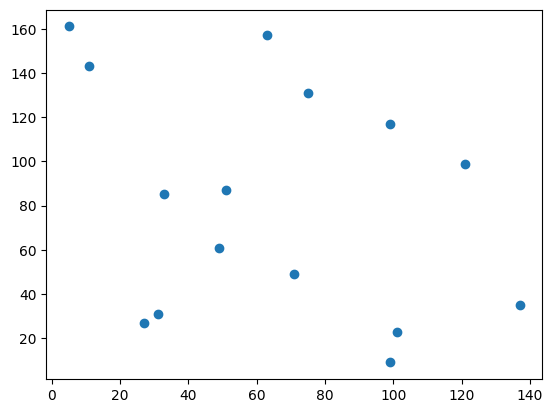

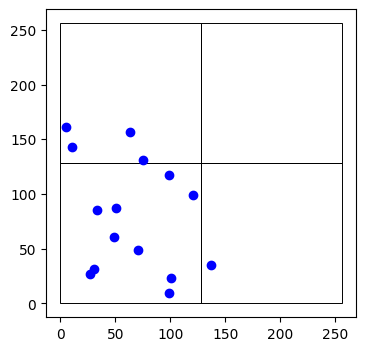

In [10]:
# quadtree demo
epsilon = 0.5
L_0 = 50
d = L_0
N = 15
r = 2

nodes = createNodes(N=N, scale=L_0)
pnodes = pertub(nodes, epsilon, L_0 * np.sqrt(2))
plt.scatter(pnodes[:, 0], pnodes[:, 1])
L = np.max(pnodes)

print("Node count post pertub: ", len(pnodes))

qtree = AroraQuadTree()
qtree.nodes = pnodes
qtree.bound = next_2power(np.max(pnodes))
qtree.build_tree()
qtree.draw(figsize=(4, 4))

In [30]:
pos = np.array((1, 3))
bound = 2
m = 4
dir = np.array((-1, 0))

def calc_portals(pos: np.array, bound: int, dir: np.array, m: int=1):
    '''Tính toán vị trí các portal
    '''
    bound_vec = np.array((bound, bound))
    corners = np.array(((-1, -1), (1, 1), (-1, 1), (1, -1)))
    if np.any([np.all(np.equal(corner, dir)) for corner in corners]):
        bound_vec = (bound_vec + 1) / 2
        return [pos + bound_vec]
    
    m += 1
    if np.all(np.equal(dir, np.array((0, 1)))): # bên phải
        return [pos + np.array((a*(bound / m), bound)) for a in range(1, m)]
    
    if np.all(np.equal(dir, np.array((1, 0)))): # bên trên            
        return [pos + np.array((bound, a*(bound/m))) for a in range(1, m)]
    
    if np.all(np.equal(dir, np.array((0, -1)))): # bên trái
        return [pos + np.array((a*(bound / m), 0)) for a in range(1, m)]
    
    if np.all(np.equal(dir, np.array((-1, 0)))): # bên dưới
        return [pos + np.array((0, a*(bound / m))) for a in range(1, m)]


print(calc_portals(pos, bound, dir))

[array([1., 4.])]


In [ ]:
def solve(tn ; )

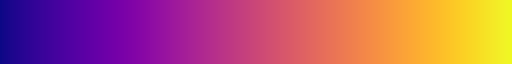

In [ ]:
cm.plasma

In [ ]:
p1 = np.array((0, 0))
p2 = np.array((0, 1.2))
p3 = np.array((2, 2))


np.all(p1 <= p2) and np.all(p2 <= p3)

True

In [ ]:
epsilon = 8
L_0 = 1024
d = L_0
N = 40

nodes = createNodes(N=N, scale=L_0)

def next_2power(num):
    '''Tìm số n = k**2 > num, gần num nhất'''
    ret = 1
    while ret < num:
        ret *= 2
    return ret


def pertub(nodes, epsilon, d, N=len(nodes)):
    '''Làm tròn tọa độ các nút để độ phức tạp của quadtree là nlog(n), rồi khử các nút trùng vị trí

    nodes: danh sách các nút
    L_0: độ dài cạnh hình vuông bao quanh mọi nút
    epsilon: tham số. epsilon > 1/(len(nodes) ** (1/3))
    d: độ dài max giữa 2 nút

    Trả về: danh sách nút, sắp xếp tăng dần theo node[0, :]
    '''
    scaled_nodes = np.round(nodes / (epsilon * d/(N**1.5)))
    return np.unique(scaled_nodes, axis=0) * 2 + 1





nodes = pertub(nodes, epsilon, d)
L = np.max(nodes)

In [ ]:
epsilon = 8
L_0 = 1024
d = L_0
N = 40

nodes = createNodes(N=N, scale=L_0)

pnodes = np.round(nodes / (epsilon * d/(N**1.5)))
pnodes1 = np.unique(pnodes, axis=0)
pnodes1

In [20]:
class Portal:
    IN = -1
    OUT = 1
    UNUSED = 0

    def __init__(self) -> None:
        self.position = np.zeros(2)
        self.state = Portal.UNUSED


class PortalSet:
    TOP = 0
    RIGHT = 1   
    DOWN = 2
    LEFT = 3

    def __init__(self, m=1) -> None:
        self.m = m
        self.portalset = [Portal() for i in range(4*self.m + 4)]

    def top(self) -> list:
        return self.portalset[: self.m+2]
    
    def down(self) -> list:
        return self.portalset[self.m+1 : 2*(self.m+1)+1]
    
    def left(self) -> list:
        return self.portalset[2*(self.m+1) : 3*(self.m+1)+1]
    
    def right(self) -> list:
        ret = self.portalset[3*(self.m+1) : 4*(self.m+1)]
        ret.append(self.portalset[0])
        return ret
    
    # def update(self, value, key):
    #     if key == "top":


    def is_valid(arr1, arr2):
        val = arr1 + reversed(arr2)
        return sum(val) == 0

    def is_valid_vertical(above=None, below=None) -> bool:
        up_port = np.array([port.state for port in above.down()])
        down_port = np.array([port.state for port in below.up()])
        return PortalSet.is_valid(up_port, down_port)

    def is_valid_horizontal(leftside=None, rightside=None) -> bool:
        left_port = np.array([port.state for port in leftside.right()])
        right_port = np.array([port.state for port in rightside.left()])
        return PortalSet.is_valid(left_port, right_port)

    def is_subproblem_valid(subprob=None) -> bool:
        pass


# portalset = PortalSet(m=2)
# print(len(portalset.portalset))
# print(len(portalset.top()))
# print(len(portalset.down()))
# print(len(portalset.left()))
# print(len(portalset.right()))

m = 2
print((0, m+2))
print((m+1-1, 2*(m+1)))
print((2*(m+1)-1, 3*(m+1)))
print((3*(m+1)-1, 4*(m+1)))

a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

a1 = a[: m+2]
b = a[m+1 : 2*(m+1)+1]
c = a[2*(m+1) : 3*(m+1)+1]
d = a[3*(m+1) : 4*(m+1)]
d.append(a[0])
print(a1)
print(b)
print(c)
print(d)

a[4] = 999

print(a)
print(b)




(0, 4)
(2, 6)
(5, 9)
(8, 12)
[0, 1, 2, 3]
[3, 4, 5, 6]
[6, 7, 8, 9]
[9, 10, 11, 0]
[0, 1, 2, 3, 999, 5, 6, 7, 8, 9, 10, 11]
[3, 4, 5, 6]


In [ ]:
tnode = TreeNode()
tnode.is_leaf = True
# tnode.solve_leaf()

m = 2

dp_table = []
portlist = np.array([(0, 0), (0, 1), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2)])
port_count = len(portlist)

point = np.array((1, 1.75))

for i in range(port_count):
    for j in range(i + 1, port_count):
        portset = [True if idx == i or idx == j else False for idx in range(port_count)]
        ports = portlist[portset]
        
        cost = np.linalg.norm(point - ports[0]) + np.linalg.norm(point - ports[1])
        dp_table.append((cost, ports))


dp_table
# a = np.array((0, 1))
# b = np.array((0, 1))
# np.array_equiv(a, b)

# def generatePortalSet(num, n=2):

In [11]:
ins = np.array((0, 1))
outs = np.array((0, 2))

tnode = TreeNode(box=(0, 0, 4, 4))
nodes = np.array(((0, 0), (3, 1), (2, 2), (1, 3)))
tnode.vertex = nodes
tnode.divide()

def solve_subproblem(tnode: TreeNode, ins, out):
    sols = []

    starts = []
    ends = []
    for child in tnode.children:
        if child.bbox.is_inside(ins):
            starts.append(child)
        if child.bbox.is_inside(out):
            ends.append(child)
    
    stack = starts
    while stack:
        node = stack.pop()
        for dir in node.directions:
            
                

# for i in ins:
#     for j in outs:
#         for child in tnode.children:
#             if child.bbox.is_inside(ins)

TypeError: unhashable type: 'numpy.ndarray'

In [41]:
def gen_parenthesis(left,right, temp, result):
    if left == 0 and right == 0:
        result.append(temp)
        return
    if left>0:
        gen_parenthesis(left-1,right,temp+'(',result)
    if right > left:
        gen_parenthesis(left, right-1, temp + ')', result)

result = []
gen_parenthesis(6, 6, "", result=result)
print(result)
print(len(result))

['(((((())))))', '((((()()))))', '((((())())))', '((((()))()))', '((((())))())', '((((()))))()', '(((()(()))))', '(((()()())))', '(((()())()))', '(((()()))())', '(((()())))()', '(((())(())))', '(((())()()))', '(((())())())', '(((())()))()', '(((()))(()))', '(((()))()())', '(((()))())()', '(((())))(())', '(((())))()()', '((()((()))))', '((()(()())))', '((()(())()))', '((()(()))())', '((()(())))()', '((()()(())))', '((()()()()))', '((()()())())', '((()()()))()', '((()())(()))', '((()())()())', '((()())())()', '((()()))(())', '((()()))()()', '((())((())))', '((())(()()))', '((())(())())', '((())(()))()', '((())()(()))', '((())()()())', '((())()())()', '((())())(())', '((())())()()', '((()))((()))', '((()))(()())', '((()))(())()', '((()))()(())', '((()))()()()', '(()(((()))))', '(()((()())))', '(()((())()))', '(()((()))())', '(()((())))()', '(()(()(())))', '(()(()()()))', '(()(()())())', '(()(()()))()', '(()(())(()))', '(()(())()())', '(()(())())()', '(()(()))(())', '(()(()))()()', '(()()(

In [ ]:
class DynamicProgramming:
    def make_solution_level(self, level):
        first_index = quad.get_c_level_index(level)  # first quadrant of that level
        last_index = quad.get_c_level_index(level + 1)  # first quadrant of the next level

        cant_portals, pairings, real_i, child1, child2 = 0, 0, 0, 0, 0
        dist1, dist2, min_dist, current_dist = 0.0, 0.0, float('inf'), 0.0
        pair1, pair2 = None, None
        sub_sol = None

        # for each Quadrant of the given level
        for ind in range(first_index, last_index):
            if quadtr[ind] is not None and quadtr[ind].children():
                cant_portals = quadtr[ind].get_cant_portals()
                pairings = cant_portals * (cant_portals - 1)
                real_i = quadtr[ind].get_real_index()
                matrix.init_column(real_i, pairings)
                # for each of its pairings
                for pairing in range(pairings):
                    sub_sol = SubSolution()
                    min_dist = float('inf')
                    current_dist = 0
                    quadtr[ind].get_pairing(pairing, pair1, pair2)
                    # get the children that share the portals
                    child1 = quad.child_shares_portal(pair1, ind)  # child that shares the start portal
                    child2 = quad.child_shares_portal(pair2, ind)  # child that shares the end portal
                    shared_ports_i = None
                    shared_ports_ii = None
                    shared_ports_iii = None
                    shared_ports_iv = None

                    pair_i, pair_ii, pair_iii, pair_iv, pair_v, min_pair_i, min_pair_ii, min_pair_iii, min_pair_iv, min_pair_v = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

                    if child1 != child2:  # if the portals do not belong to the same child
                        # find out if the other children have nodes or not, or which one has them
                        which_with_nodes = quad.rest_without_nodes(ind, child1, child2)

                        # consider possible cases
                        if quad.adjacent(child1, child2):
                            if which_with_nodes == NONE:  # none of the other children have nodes
                                shared_ports_i = quad.get_shared_portals(child1, child2)

                                child_num = quad.get_child_number(child1)

                                # iterate over each portal shared by the children
                                for p_aux in shared_ports_i:
                                    # get the pairing numbers
                                    pair_i = quadtr[child1].get_pair_num(pair1, p_aux)
                                    pair_ii = quadtr[child2].get_pair_num(p_aux, pair2)
                                    current_dist = matrix.get(quadtr[child1].get_real_index(), pair_i).get_distance() + matrix.get(quadtr[child2].get_real_index(), pair_ii).get_distance()

                                    # compare with the previous minimum data
                                    if current_dist < min_dist:
                                        min_dist = current_dist
                                        min_pair_i = pair_i
                                        min_pair_ii = pair_ii

                                # set the matrix with the minimum distance obtained
                                sub_sol.add_child(child1)
                                sub_sol.add_child(child2)
                                sub_sol.add_pairing(min_pair_i)
                                sub_sol.add_pairing(min_pair_ii)
                                sub_sol.set_distance(min_dist)
                                matrix.set(sub_sol, real_i, pairing)


In [ ]:
portals = np.array((0, 0), (0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2))
point = np.array((1, 1.4))

portals[0]
np.

dptable = []

def solve_leaf(portals, point):


In [9]:
print(f"n1: {np.array(((0, 1), (0, 2))).tobytes()}")
print(f"n2: {np.array(((0, 1, 0, 2))).tobytes()}")

n1: b'\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00'
n2: b'\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00'


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

np.random.seed(42)  # Đảm bảo kết quả nhất quán


def createNodes(N, scale=100):
    """Tạo nút ngẫu nhiên"""
    return np.random.rand(N, 2) * scale


class AroraQuadTree:
    """Quadtree được sử dụng trong Arora PTAS
    
    nodes: Các điểm cần đi qua trong bài toán TSP
    root: Gốc của cây, dạng TreeNode
    bounds: độ to của bounding box. bounds > max(nodes)

    """
    def __init__(self) -> None:
        """Khởi tạo các giá trị mặc định cho cây
        """
        self.nodes: np.ndarray = []
        self.root : TreeNode = TreeNode()
        self.levels = 0
        self.bound = 0

    
    def build_tree(self):
        """Dựng quadtree, dựa trên nodes
        Cần phải nhập nodes và bounds trước khi gọi hàm này
        """
        assert self.bound != 0, "Cần nhập bound của cây trước!"
        assert self.bound > np.max(self.nodes), "Bounds không đủ to để chứa mọi node!"
        assert len(self.nodes), "Cần nhập danh sách node cho cây!"
        self.root.vertex = self.nodes
        self.root.bbox.bound = np.array((self.bound, self.bound))
        TreeNode.divide(self.root)

    
    def solve_tree(self):
        node = self.root
        tour_length = 0
        tour_choices = []
        for child in node.children:
            if len(child.vertex) == 0:
                continue
            tour_length += 1
            tour_choices.append(child)

        queue = [([tour_choices[0]], 1)]
        travel_order = []
        # tìm các đường đi khả thi
        while queue:
            current_path, node_count = queue.pop()
            # print(f"path: {[node.bbox.pos for node in current_path]}")
            # print(f"count: {node_count}")
            next_poss = [child for child in tour_choices if child is not current_path[-1]]

            for nextp in next_poss:
                if nextp is tour_choices[0]:
                    print(f"path: {[node.bbox.pos for node in current_path]}")
                    if node_count == tour_length or (node_count == tour_length-1 and len(nextp.vertex) != 0):
                        current_path.append(nextp)
                        travel_order.append(current_path)
                        continue

                if len(current_path) < 4:
                    next_count = node_count
                    if len(nextp.vertex) != 0:
                        next_count += 1
                    queue.append((current_path + [nextp], next_count))
        

        min_tour = None # tìm đường đi tốt nhất
        min_tour_cost = np.iinfo(np.int64).max # Max value
        for order in travel_order:
            portal_tours = TreeNode.get_inner_portal_tour(order)
            
            for t, port_tour in enumerate(portal_tours):
                tour_cost = 0
                current_tour = []

                for i, node in enumerate(order):    
                    cost, subtour = node.solve_subproblem(port_tour[i-1], port_tour[i])
                    tour_cost += cost
                    current_tour = current_tour + subtour
                
                if tour_cost < min_tour_cost:
                    min_tour_cost = tour_cost
                    min_tour = current_tour
        
        return (min_tour_cost, min_tour)


    def draw(self, figsize=(10, 10)):
        """Vẽ quadtree
        figsize: Độ lớn của hình
        """
        fig, ax = plt.subplots(figsize=figsize)
        self.root.draw(ax)
        plt.show()


class TreeNode:
    """Nút của quadtree

    level: Độ sâu trên cây
    parent: Nút cha
    children: Các nút con
    is_leaf: True nếu là nút lá và vertex != None

    bbox: HCN bao quanh
    vertex: Các điểm nằm trong bbox
    portals: Các portal nằm trên ô
    
    """
    def __init__(self, box=(0,0,0,0)) -> None:
        self.level = 0
        self.parent = None
        self.children = None
        self.neighbors = []
        self.bbox = BBox(box)
        self.is_leaf = False
        self.portals = np.array([]).reshape((0, 2))
        self.portal_cache = {}
        self.local_idx = -1
        self.vertex = []
        self.directions = []
        self.solutions = {}
        self.m = 1


    def divide(node):
        """Tạo 4 nút con
        node: nút đang xét
        """
        node.children = [TreeNode(), TreeNode(), TreeNode(), TreeNode()]
        for child in node.children:
            child.parent = node
            child.bbox.bound = node.bbox.bound // 2
            child.level = node.level + 1
            child.m = node.m
        
        b, _ = node.bbox.bound // 2
        node.children[0].bbox.pos = node.bbox.pos
        node.children[1].bbox.pos = node.bbox.pos + np.array((0, b))
        node.children[2].bbox.pos = node.bbox.pos + np.array((b, 0))
        node.children[3].bbox.pos = node.bbox.pos + np.array((b, b))

        for i in range(4):
            node.children[i].local_idx = i

        for child in node.children:
            child.vertex = node.vertex[[child.bbox.is_inside(v) for v in node.vertex]]
            if len(child.vertex) == 0:
                continue
            if len(child.vertex) == 1:
                child.is_leaf = True
                continue
            TreeNode.divide(child)

        for i1 in range(4): # Thêm portals
            for i2 in range(i1+1, 4):
                if len(node.children[i1].vertex) > 0 and len(node.children[i2].vertex) > 0:
                    dir = TreeNode.idx_to_vec(i1, i2)
                    node.children[i1].directions.append(dir)
                    node.children[i2].directions.append(- dir)
                    portals = node.children[i1].calc_portals(dir, m=node.m)
                    # print(f"portals: {portals}")
                    # print(f"node portals: {node.children[i].portals}")

                    node.children[i1].portals = np.concatenate((node.children[i1].portals, portals), axis=0)
                    node.children[i2].portals = np.concatenate((node.children[i2].portals, portals), axis=0)
                    node.children[i1].neighbors.append(node.children[i2])
                    node.children[i2].neighbors.append(node.children[i1])
            
        

    def calc_portals(self, dir: np.array, m: int=1):
        '''Tính toán vị trí các portal
        '''
        if dir.tobytes() in self.portal_cache:
            return self.portal_cache[dir.tobytes()]

        bound = self.bbox.bound[0]
        pos = self.bbox.pos
        bound_vec = np.array((bound, bound))
        corners = np.array(((-1, -1), (1, 1), (-1, 1), (1, -1))) # trong góc
        if np.any([np.all(np.equal(corner, dir)) for corner in corners]):
            dir = (dir + 1) / 2
            ret = [pos + np.multiply(bound_vec, dir)]
            self.portal_cache[dir.tobytes()] = ret
            return ret
        
        m += 1
        if np.array_equiv(dir, np.array((0, 1))): # bên phải
            ret = [pos + np.array((a*(bound / m), bound)) for a in range(1, m)]
            self.portal_cache[dir.tobytes()] = ret
            return ret
        
        if np.array_equiv(dir, np.array((1, 0))): # bên trên
            ret = [pos + np.array((bound, a*(bound/m))) for a in range(1, m)]
            self.portal_cache[dir.tobytes()] = ret
            return ret
        
        if np.array_equiv(dir, np.array((0, -1))): # bên trái
            ret = [pos + np.array((a*(bound / m), 0)) for a in range(1, m)]
            self.portal_cache[dir.tobytes()] = ret 
            return ret
        
        if np.array_equiv(dir, np.array((-1, 0))): # bên dưới
            ret = [pos + np.array((0, a*(bound / m))) for a in range(1, m)]
            self.portal_cache[dir.tobytes()] = ret
            return ret


    
    def idx_to_vec(i1 : int, i2 : int):
        """Tính vector đi từ local index i1 đến i2
        i1 và i2 cần có chung node mẹ

        i1: int, local index
        i2: int, local index
        """
        i1v = np.array((i1 // 2, i1 % 2))
        i2v = np.array(((i2 // 2, i2 % 2)))
        return i2v - i1v
    

    def solve_leaf(self, ins, out):
        if len(self.vertex) == 1:
            cost = np.linalg.norm(ins - self.vertex[0]) + np.linalg.norm(self.vertex[0] - out)
            # plt.plot((ins[0], self.vertex[0][0]), (ins[1], self.vertex[0][1]), color='g', alpha=1)
            # plt.plot((out[0], self.vertex[0][0]), (out[1], self.vertex[0][1]), color='g', alpha=1)
            return (cost, [self.vertex[0]])
        else:
            # plt.plot((ins[0], out[0]), (ins[1], out[1]), color='g', alpha=1)
            return (np.linalg.norm(ins - out), [])


    def solve_subproblem(self, ins, out):
        key = np.concatenate((ins, out)).tobytes()
        if key in self.solutions:
            return self.solutions[key]

        if len(self.vertex) <= 1:
            return self.solve_leaf(ins, out)

        starts = []
        ends = []
        travel_order = []
        min_path = 0
        for child in self.children:
            # if len(child.vertex) == 0:
            #     continue
            if child.bbox.is_inside_inclusive(ins):
                starts.append(child)
            if child.bbox.is_inside_inclusive(out):
                ends.append(child)
            if len(child.vertex) != 0:
                min_path += 1
        

        queue = [([st], 1) if len(st.vertex) != 0 else ([st], 0) for st in starts]

        # tìm các đường đi khả thi
        while queue:
            current_path, node_count = queue.pop()
            print(f"path: {[node.bbox.pos for node in current_path]}")
            print(f"count: {node_count}")
            next_poss = [child for child in self.children if child not in current_path]

            for nextp in next_poss:
                if nextp in ends:
                    print(f"end: {nextp.bbox.pos}")
                    if node_count == min_path or (node_count == min_path-1 and len(nextp.vertex) != 0):
                        current_path.append(nextp)
                        travel_order.append(current_path)
                        continue

                if len(current_path) < 4:
                    next_count = node_count
                    if len(nextp.vertex) != 0:
                        next_count += 1
                    queue.append((current_path + [nextp], next_count))
            print("-----------------------------")

        # print(f"travel order: {[[node.bbox.pos for node in tour] for tour in travel_order]}")

        # for tour in travel_order:
        #     print(f"tour: {[node.bbox.pos for node in tour]}")

    
        # while queue:
        #     current_path = queue.pop()
        #     next_poss = current_path[-1].neighbors
        #     for nextp in next_poss:
        #         if nextp in ends and len(current_path) == min_path-1 and nextp not in current_path:
        #             current_path.append(nextp)
        #             travel_order.append(current_path)
        #         if nextp not in current_path and len(current_path) < 4:
        #             queue.append(current_path + [nextp])
        # else:
        #     while queue:
        #         current_path = queue.pop()
        #         next_poss = current_path[-1].neighbors
        #         for nextp in next_poss:
        #             if len(current_path) == min_path-1 and nextp not in current_path:
        #                 current_path.append(nextp)
        #                 travel_order.append(current_path)
        #             if nextp not in current_path:
        #                 queue.append(current_path + [nextp])

        
        min_tour = None # tìm đường đi tốt nhất
        min_tour_cost = np.iinfo(np.int64).max # Max value
        for order in travel_order:
            print(f"node order: {[node.vertex for node in order]}")
            portal_tours = TreeNode.get_portal_tour(order, ins, out)
            
            for t, port_tour in enumerate(portal_tours):
                tour_cost = 0
                current_tour = []

                for i, node in enumerate(order):    
                    cost, subtour = node.solve_subproblem(port_tour[i], port_tour[i+1])
                    tour_cost += cost
                    current_tour = current_tour + subtour
                
                if tour_cost < min_tour_cost:
                    min_tour_cost = tour_cost
                    min_tour = current_tour
        
        key = np.concatenate((ins, out)).tobytes()
        self.solutions[key] = (min_tour_cost, min_tour)
        return (min_tour_cost, min_tour)

    
    def get_portal_tour(path, ins, out):
        """Tính danh sách các portal có thể đi qua
        path: các node cần đi qua (theo thứ tự)
        ins: portal khởi đầu
        out: portal kết thúc
        """
        viable_paths = np.array(ins)
        for i in range(len(path) - 1):
            dir = TreeNode.idx_to_vec(path[i].local_idx, path[i+1].local_idx)
            ports = path[i].calc_portals(dir, m=path[i].m)
            viable_paths = add_to_path(viable_paths, np.array(ports))
        viable_paths = add_to_path(viable_paths, np.array(out))

        return viable_paths

    
    def get_inner_portal_tour(path):
        assert len(path) > 1
        dir = TreeNode.idx_to_vec(path[0].local_idx, path[1].local_idx)
        viable_paths = np.array(path[0].calc_portals(dir, m=path[0].m))
        for i in range(len(path) - 1):
            dir = TreeNode.idx_to_vec(path[i].local_idx, path[i+1].local_idx)
            ports = path[i].calc_portals(dir, m=path[i].m)
            viable_paths = add_to_path(viable_paths, np.array(ports))

        return viable_paths


    def draw(self, ax):
        """Vẽ bbox và vertex. Làm tương tự với các nút con
        ax: Matplotlib axes
        """
        self.bbox.draw(ax) # vẽ bbox

        plt.scatter(self.portals[:, 0], self.portals[:, 1], marker='x', c='r') # vẽ portals 

        if self.is_leaf: # vẽ các điểm
            for i in range(len(self.vertex)):
                plt.scatter(self.vertex[i, 0], self.vertex[i, 1], color='b')
                # ax.annotate(self.level, (self.vertex[i, 0], self.vertex[i, 1]))
                ax.annotate(f"{(self.vertex[i, 0], self.vertex[i, 1])}", (self.vertex[i, 0], self.vertex[i, 1]))
            return

        if self.children == None:
            return
        for child in self.children:
            child.draw(ax)



class BBox:
    """Hình chữ nhật trong không gian 2D"""
    def __init__(self, box=(0,0,0,0)) -> None:
        """Khởi tạo hình chữ nhật
        box: vị trí và kích cỡ hcn
        """
        self.pos = np.array((box[0], box[1]))
        self.bound = np.array((box[2], box[3]))


    def is_inside(self, p) -> bool:
        """Kiểm tra điểm p có nằm trong hcn không
        Nếu p ở trên cạnh trên hoặc cạnh trái => False
        Nếu ở cạnh dưới hoặc cạnh phải => True

        p: Tọa độ điểm cần kiểm tra
        """
        return np.all(self.pos < p) and np.all(p <= self.pos + self.bound)
    

    def is_inside_inclusive(self, p) -> bool:
        """Kiểm tra điểm p có nằm trong hcn không
        Nếu p ở trên cạnh hcn => True

        p: Tọa độ điểm cần kiểm tra
        """
        return np.all(self.pos <= p) and np.all(p <= self.pos + self.bound)
    

    def is_inside_exclusive(self, p) -> bool:
        """Kiểm tra điểm p có nằm trong hcn không
        Nếu p ở trên cạnh hcn => False

        p: Tọa độ điểm cần kiểm tra
        """
        return np.all(self.pos <= p) and np.all(p <= self.pos + self.bound)
    

    def center(self) -> np.ndarray:
        """Tâm của hình chữ nhật"""
        return (self.pos + self.bound / 2)
    

    def draw(self, ax):
        """Vẽ HCN
        ax: Matplotlib axes
        """
        width, height = self.bound
        rect = plt.Rectangle(self.pos, width, height, edgecolor='k', facecolor='none', linewidth=0.7, linestyle="-")
        ax.add_patch(rect)



def next_2power(num):
    '''Tìm số n = k**2 > num, gần num nhất'''
    ret = 1
    while ret < num:
        ret *= 2
    return ret

def pertub(nodes, epsilon, d):
    '''Làm tròn tọa độ các nút để độ phức tạp của quadtree là nlog(n), rồi khử các nút trùng vị trí

    nodes: danh sách các nút
    L_0: độ dài cạnh hình vuông bao quanh mọi nút
    epsilon: tham số. epsilon > 1/(len(nodes) ** (1/3))
    d: độ dài max giữa 2 nút

    Trả về: danh sách nút, sắp xếp tăng dần theo node[0, :]
    '''
    scaled_nodes = np.round(nodes / (epsilon * d/(len(nodes)**1.5)))
    return np.unique(scaled_nodes, axis=0) * 2 + 1


# quadtree demo
# epsilon = 1.3
# L_0 = 1000
# d = L_0
# N = 60
# r = 2

# nodes = createNodes(N=N, scale=L_0)
# pnodes = pertub(nodes, epsilon, L_0 * np.sqrt(2))
# plt.scatter(pnodes[:, 0], pnodes[:, 1])
# L = np.max(pnodes)

# print("Lượng node sau khi làm tròn: ", len(pnodes))

# qtree = AroraQuadTree()
# qtree.nodes = pnodes
# qtree.bound = next_2power(np.max(pnodes))
# qtree.build_tree()
# qtree.draw(figsize=(7, 7))


path = np.array([[(0, 1), (0, 2)], [(1, 1), (1, 2)]])
next = np.array(((2, 3), (2, 4)))

temppath = np.empty(0)
npath = []

def add_to_path(pathlist : np.ndarray, next : np.ndarray):
    """Thêm các nút (hoặc portal) vào đường đi
    pathlist: các đường đi hiện có
    next: các điểm có thể đến tiếp theo
    """
    npath = []
    # print(f"pathlist: {pathlist}")
    # print(f"next: {next}")

    if len(pathlist.shape) == 1:
        if len(next.shape) == 1:
            npath.append(np.concatenate((pathlist.reshape(1, 2), next.reshape(1, 2)), axis=0))
            return np.array(npath)

        for n in next[:, :]:
            npath.append(np.concatenate((pathlist.reshape(1, 2), n.reshape(1, 2)), axis=0))
            return np.array(npath)
        
    if len(next.shape) == 1:
        for p in pathlist[:, :]:
            npath.append(np.concatenate((p, next.reshape(1, 2)), axis=0))
        return np.array(npath)

    for p in pathlist[:, :]:
        for n in next[:, :]:
            npath.append(np.concatenate((p, n.reshape(1, 2)), axis=0))
    return np.array(npath)
    



ins = np.array((0, 16))
outs = np.array((12, 0))

tnode = TreeNode(box=(0, 0, 16, 16))
nodes = np.array(((3, 1), (3, 3), (9, 3), (1, 3), (5, 7)))
tnode.vertex = nodes
tnode.divide()


fig, ax = plt.subplots(figsize=(7, 7))
tnode.draw(ax)
plt.scatter(ins[0], ins[1], c='g', marker='x', s=1000, linewidths=5)
plt.scatter(outs[0], outs[1], c='g', marker='x', s=1000, linewidths=5)
# plt.show()

cost, tour = tnode.solve_subproblem(ins, outs)
# print(f"cost: {cost}")
# print(f"tour: {tour}")


plt.plot((ins[0], tour[0][0]), (ins[1], tour[0][1]), color='b')
for i in range(len(tour) - 1):
    plt.plot((tour[i][0], tour[i+1][0]), (tour[i][1], tour[i + 1][1]), color='b')
plt.plot((tour[-1][0], outs[0]), (tour[-1][1], outs[1]), color='b')
plt.show()


In [36]:
import numpy as np

UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

class Portal:
    UNUSED = 0
    IN = -1
    OUT = 1

portalset = np.array([])

def index_to_position(idx : int) -> np.ndarray:
    return np.array((idx // 2, idx % 2))


def match(set1, set2, idx1, idx2) -> bool:
    pos1 = index_to_position(idx1)
    pos2 = index_to_position(idx2)
    direction = set2 - set1

    portal_test = 
    

def portal_edge_index(direction, portal_count) -> np.ndarray:
    m = (portal_count - 4) // 4

    if direction == UP:
        return np.arange(m+2, dtype=np.int32)
    
    if direction == RIGHT:
        return np.arange(m+1, 2*(m+1)+1, dtype=np.int32)
    
    if direction == DOWN:
        return np.arange(2*(m+1), 3*(m+1)+1, dtype=np.int32)
    
    if direction == LEFT:
        ret = np.arange(3*(m+1), 4*(m+1), dtype=np.int32)
        return np.concatenate((ret, np.zeros(1, dtype=np.int32)))
    
portalset = np.arange(4*m + 1)
left = portal_edge_index(LEFT, len(portalset))
right = portal_edge_index(RIGHT, len(portalset))
up = portal_edge_index(UP, len(portalset))
down = portal_edge_index(DOWN, len(portalset))

m = 5
%timeit
print(portal_edge_index(UP, 4*m + 1))
print(portal_edge_index(DOWN, 4*m + 1))
print(portal_edge_index(LEFT, 4*m + 1))
print(portal_edge_index(RIGHT, 4*m + 1))

print(portalset[left])
print(portalset[right])
print(portalset[up])
print(portalset[down])


[0 1 2 3 4 5]
[10 11 12 13 14 15]
[15 16 17 18 19  0]
[ 5  6  7  8  9 10]
[15 16 17 18 19  0]
[ 5  6  7  8  9 10]
[0 1 2 3 4 5]
[10 11 12 13 14 15]


In [13]:
%timeit